In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Dataset reading
dts = pd.read_csv("insurance_pre.csv")

In [3]:
dts

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [6]:
#Viewing the columns in table
dts.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [7]:
#converting the categorical value to numerical value
dts = pd.get_dummies(dts)

In [8]:
dts

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0
2,28,33.000,3,4449.46200,0,1,1,0
3,33,22.705,0,21984.47061,0,1,1,0
4,32,28.880,0,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0
1334,18,31.920,0,2205.98080,1,0,1,0
1335,18,36.850,0,1629.83350,1,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0


In [10]:
feature = dts[["age","bmi","children","sex_female","sex_male","smoker_no","smoker_yes"]]
target = dts[["charges"]]

In [11]:
feature

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,1,0,0,1
1,18,33.770,1,0,1,1,0
2,28,33.000,3,0,1,1,0
3,33,22.705,0,0,1,1,0
4,32,28.880,0,0,1,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0
1334,18,31.920,0,1,0,1,0
1335,18,36.850,0,1,0,1,0
1336,21,25.800,0,1,0,1,0


In [13]:
target

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [14]:
#splitting train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(feature,target,test_size=0.33,random_state=0)

In [15]:
X_train, X_test

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes
 1271   25  34.485         0           1         0          1           0
 1313   19  34.700         2           1         0          0           1
 2      28  33.000         3           0         1          1           0
 405    52  38.380         2           1         0          1           0
 482    18  31.350         0           1         0          1           0
 ...   ...     ...       ...         ...       ...        ...         ...
 763    27  26.030         0           0         1          1           0
 835    42  35.970         2           0         1          1           0
 1216   40  25.080         0           0         1          1           0
 559    19  35.530         0           0         1          1           0
 684    33  18.500         1           1         0          1           0
 
 [896 rows x 7 columns],
       age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes
 578    52 

In [16]:
Y_train, Y_test

(          charges
 1271   3021.80915
 1313  36397.57600
 2      4449.46200
 405   11396.90020
 482    1622.18850
 ...           ...
 763    3070.80870
 835    7160.33030
 1216   5415.66120
 559    1646.42970
 684    4766.02200
 
 [896 rows x 1 columns],
           charges
 578    9724.53000
 610    8547.69130
 569   45702.02235
 1034  12950.07120
 198    9644.25250
 ...           ...
 117   19107.77960
 520   25656.57526
 422   39125.33225
 294    3906.12700
 261   17085.26760
 
 [442 rows x 1 columns])

In [17]:
#Model creation and training
from sklearn.tree import DecisionTreeRegressor
model_create = DecisionTreeRegressor(criterion="mae",splitter="best", max_features = "sqrt")
model_create = model_create.fit(X_train,Y_train)

/home/had/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


In [20]:
Y_pred = model_create.predict(X_test)

In [21]:
Y_pred

array([ 9957.7216 ,  8930.93455, 44202.6536 , 12741.16745, 13204.28565,
       21984.47061,  1615.7667 , 10381.4787 ,  6184.2994 ,  5253.524  ,
        5693.4305 , 10848.1343 , 21774.32215,  4571.41305, 18246.4955 ,
       11299.343  , 13129.60345,  2852.6734 ,  6455.86265, 34672.1472 ,
       23306.547  , 11674.13   ,  9625.92   , 24535.69855,  1826.843  ,
        4076.497  ,  2680.9493 ,  8252.2843 ,  3757.8448 ,  8027.968  ,
        8252.2843 , 48673.5588 , 13981.85035, 11365.952  , 15006.57945,
        3554.203  ,  8978.1851 , 34806.4677 , 39836.519  ,  1880.07   ,
        1241.565  ,  2866.091  , 21082.16   , 43813.8661 , 38792.6856 ,
        2852.6734 , 11299.343  ,  6389.37785,  4719.52405, 25678.77845,
       13126.67745,  4234.927  , 21978.6769 , 24180.9335 , 12235.8392 ,
       19673.33573,  2497.0383 ,  9869.8102 , 10096.97   , 30166.61817,
        1712.227  , 46130.5265 , 15161.5344 , 25333.33284, 12949.1554 ,
        9877.6077 , 34672.1472 , 43753.33705,  6686.4313 ,  7512

In [22]:
from sklearn.metrics import r2_score
rscore = r2_score(Y_test,Y_pread)

In [23]:
rscore

0.709588445293925

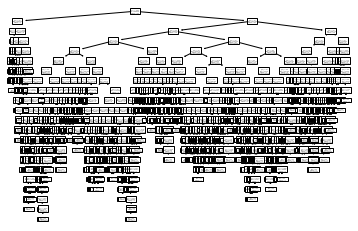

In [24]:
from sklearn import tree
tree.plot_tree(model_create)
plt.show()